# Global Health Data Analysis Example

This notebook demonstrates how to use the Python scripts in this repository to analyze global health data from DHS and DHIS2 sources.

## Setup
First, let's import the necessary modules and libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import functions from our scripts
from maternal_health import analyze_maternal_indicators
from vaccination_coverage import calculate_vaccination_coverage
from nutrition_analysis import analyze_nutrition_data

# Set plot style
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("viridis")

## Maternal Health Analysis

Let's analyze maternal health indicators and create a visualization:

Maternal Health Indicators Analysis

Summary Statistics:
Anc Coverage:
  Mean: 70.9
  Min: 59.7 (Region: West)
  Max: 82.3 (Region: East)

Skilled Birth Attendance:
  Mean: 73.6
  Min: 58.9 (Region: South)
  Max: 88.4 (Region: East)

Maternal Mortality Ratio:
  Mean: 307.6
  Min: 198.0 (Region: East)
  Max: 412.0 (Region: South)

Postnatal Care:
  Mean: 54.1
  Min: 42.3 (Region: South)
  Max: 67.1 (Region: East)

Correlation between Skilled Birth Attendance and Maternal Mortality:
  Correlation coefficient: -0.99


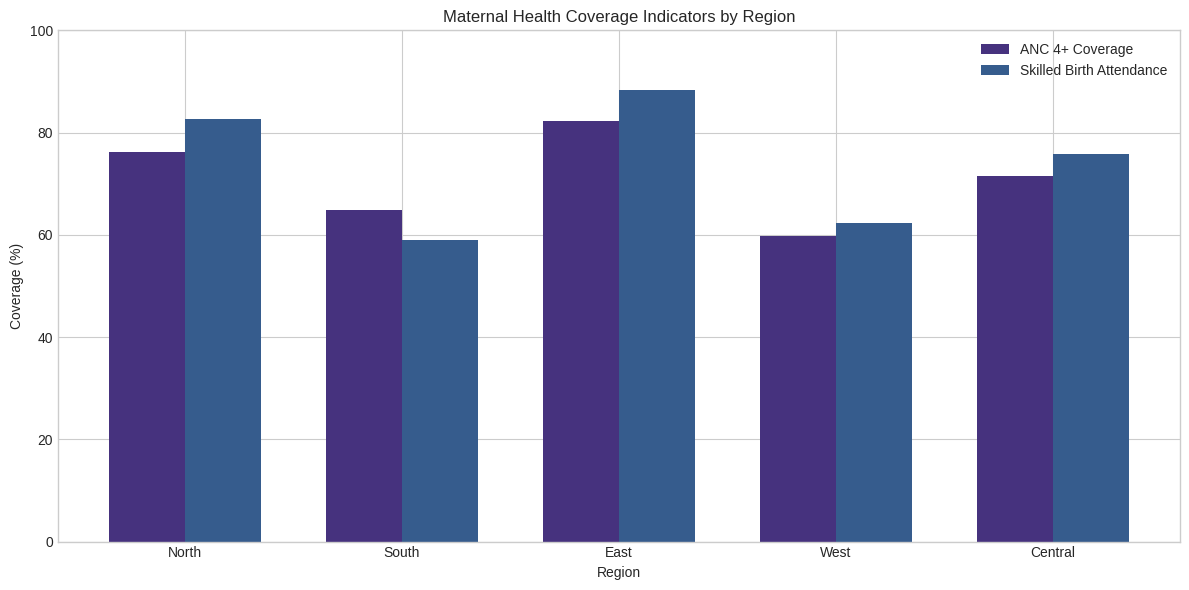

In [ ]:
# Get maternal health data
maternal_data = analyze_maternal_indicators()

# Create visualization of maternal health indicators by region
plt.figure(figsize=(12, 6))

# Create a bar plot for ANC coverage and skilled birth attendance
x = np.arange(len(maternal_data["region"]))
width = 0.35

plt.bar(x - width / 2, maternal_data["anc_coverage"], width, label="ANC 4+ Coverage")
plt.bar(
    x + width / 2,
    maternal_data["skilled_birth_attendance"],
    width,
    label="Skilled Birth Attendance",
)

plt.xlabel("Region")
plt.ylabel("Coverage (%)")
plt.title("Maternal Health Coverage")
plt.xticks(x, maternal_data["region"])
plt.legend()
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

## Vaccination Coverage Analysis

Next, let's examine vaccination coverage and create a visualization of coverage by district:

Vaccination Coverage Analysis

National Coverage Estimates:
  BCG: 88.9%
  PENTA1: 84.9%
  PENTA3: 72.1%
  MEASLES: 68.7%

Dropout Rates:
  Penta1 to Penta3 dropout rate: 15.0%
  BCG to Measles dropout rate: 22.7%

Districts with low Penta3 coverage (<70%):
  District B: 68.9%
  District D: 64.5%


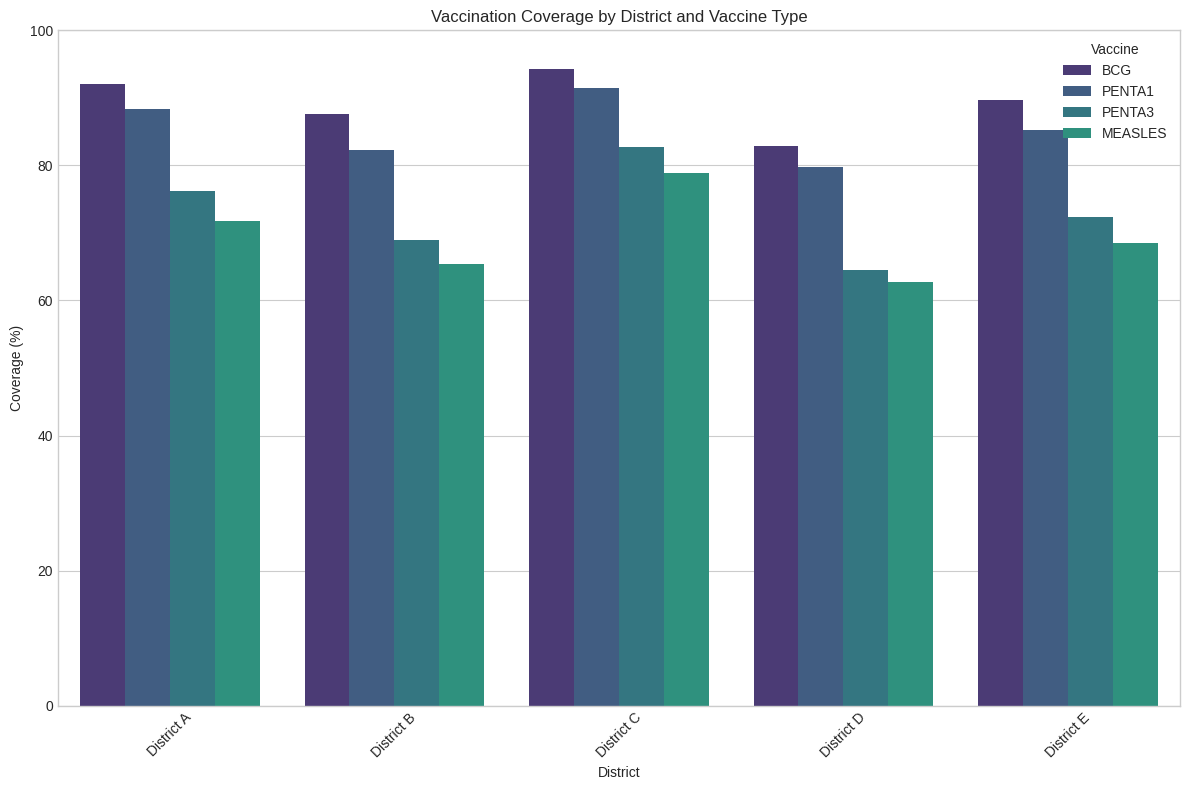

In [3]:
# Get vaccination coverage data
vaccination_data = calculate_vaccination_coverage()

# Melt the dataframe to prepare for plotting
vaccination_melted = pd.melt(
    vaccination_data,
    id_vars=["district"],
    value_vars=[
        "bcg_coverage",
        "penta1_coverage",
        "penta3_coverage",
        "measles_coverage",
    ],
    var_name="vaccine",
    value_name="coverage",
)

# Clean up vaccine names for display
vaccination_melted["vaccine"] = (
    vaccination_melted["vaccine"].str.replace("_coverage", "").str.upper()
)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x="district", y="coverage", hue="vaccine", data=vaccination_melted)
plt.title("Vaccination Coverage by District and Vaccine Type")
plt.xlabel("District")
plt.ylabel("Coverage (%)")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.legend(title="Vaccine")
plt.tight_layout()
plt.show()

## Nutrition Analysis

Finally, let's analyze child nutrition data and create a visualization:

Child Nutrition Status Analysis

National Prevalence Estimates:
  Stunting: 34.1%
  Wasting: 9.3%
  Underweight: 21.0%
  Exclusive breastfeeding: 50.2%

Stunting Severity Classification by Province:
  Province 1: 32.4% (High severity)
  Province 2: 41.7% (Very high severity)
  Province 3: 28.9% (Medium severity)
  Province 4: 36.2% (High severity)
  Province 5: 30.5% (High severity)

Correlation between exclusive breastfeeding and malnutrition indicators:
  Stunting: -0.97
  Wasting: -0.99
  Underweight: -0.98


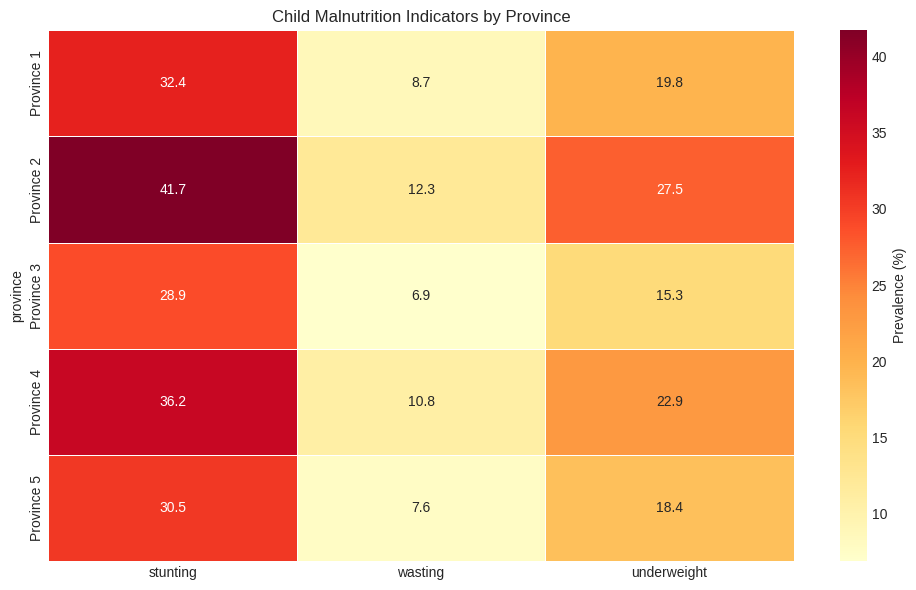

In [4]:
# Get nutrition data
nutrition_data = analyze_nutrition_data()

# Create a heatmap of malnutrition indicators by province
# Select relevant columns
heatmap_data = nutrition_data[
    ["province", "stunting", "wasting", "underweight"]
].set_index("province")

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="YlOrRd",
    fmt=".1f",
    cbar_kws={"label": "Prevalence (%)"},
    linewidths=0.5,
)
plt.title("Child Malnutrition Indicators by Province")
plt.tight_layout()
plt.show()

## Integrated Analysis

Now let's look at the relationship between vaccination coverage and exclusive breastfeeding:

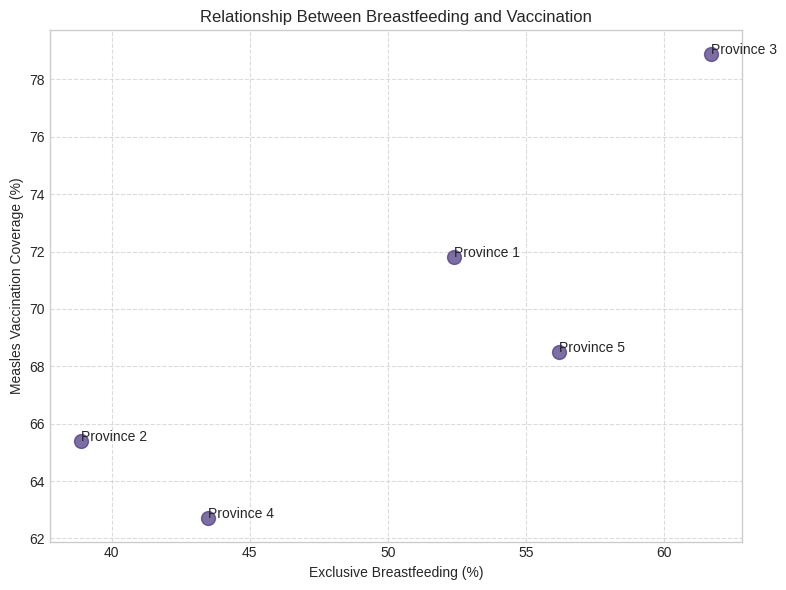

In [5]:
# This is just a demonstration - in a real scenario we would need to merge datasets
# For this example, we'll create synthetic data that links the provinces and districts

# Create a sample mapping (for demonstration purposes only)
mapping = {
    "Province 1": "District A",
    "Province 2": "District B",
    "Province 3": "District C",
    "Province 4": "District D",
    "Province 5": "District E",
}

# Create a new DataFrame with mapped data
nutrition_data["district"] = nutrition_data["province"].map(mapping)
combined_data = pd.merge(nutrition_data, vaccination_data, on="district")

# Plot the relationship between exclusive breastfeeding and measles vaccination
plt.figure(figsize=(8, 6))
plt.scatter(
    combined_data["exclusive_bf"], combined_data["measles_coverage"], s=100, alpha=0.7
)
plt.xlabel("Exclusive Breastfeeding (%)")
plt.ylabel("Measles Vaccination Coverage (%)")
plt.title("Relationship Between Breastfeeding and Vaccination")

# Add province labels
for i, txt in enumerate(combined_data["province"]):
    plt.annotate(
        txt,
        (
            combined_data["exclusive_bf"].iloc[i],
            combined_data["measles_coverage"].iloc[i],
        ),
    )

plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## Conclusion

This notebook has demonstrated how to use the scripts in this repository to analyze global health data from DHS and DHIS2 sources. The analyses show how maternal health indicators, vaccination coverage, and child nutrition status can be examined and visualized.

For more information, refer to the documentation in `docs.md`.